## **Business Scenario**

A financial institution processes thousands of card transactions every minute.
Fraudulent transactions cause financial loss and customer dissatisfaction.

A **single rule-based system** is not reliable enough because:

- Fraud patterns change frequently
- Individual decision rules may be noisy

The company wants a **robust decision** system that:

- Reduces false alarms
- Detects fraud consistently
- Is less sensitive to noisy data

You are hired as a **Data Analyst** to build such a system.

### **Tasks**
1. Load the dataset and understand the transaction-related attributes.
2. Identify relevant features that may help distinguish:
    - Fraudulent transactions
    - Legitimate transactions
3. Build a classification model that can decide whether a transaction is fraud or
not fraud.
4. Train the model using historical transaction data.
5. Predict outcomes for unseen transactions.
6. Evaluate the model using appropriate classification metrics.
7. Analyze the following:
    - How many fraudulent transactions were correctly detected?
    - How many legitimate transactions were incorrectly flagged as fraud?
8. Compare model behavior with a single rule-based classifier:
    - Which model is more stable?
    - Which model is less sensitive to noise?

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\DELL\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
def detect(df):
    outlier_cols = []
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        if ((df[col] < lower) | (df[col] > upper)).any():
            outlier_cols.append(col)
    return outlier_cols
outlier_cols = detect(df)
print(outlier_cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
x = df.drop('Class',axis=1)
y = df['Class']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier(
    n_estimators=10,
    max_depth=10,
    class_weight='balanced'
)
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10)

In [33]:
y_pred = rf_model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test,y_pred)
print(f"Accuarcy: {acc}")

Accuarcy: 0.9994557775359011


TP: 78
FP: 11
TN: 56853
FN: 20


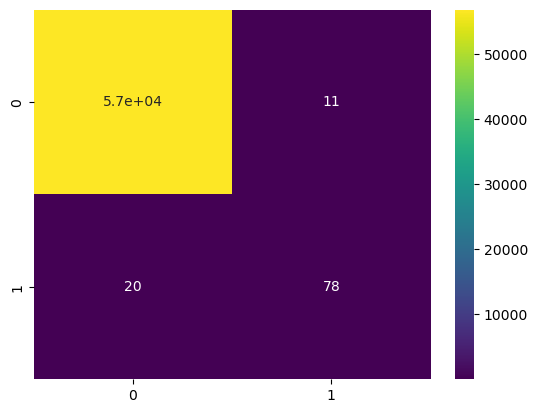

In [35]:
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='viridis')
tn, fp, fn, tp = cm.ravel()
print("TP:",tp)
print("FP:",fp)
print("TN:",tn)
print("FN:",fn)

Accuarcy:  0.978775323900144
TP: 79
FP: 1190
TN: 55674
FN: 19


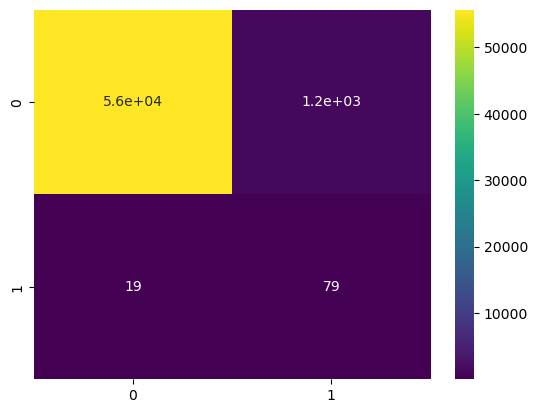

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuarcy: ",accuracy_score(y_test, y_pred))

cn = confusion_matrix(y_test, y_pred)
sns.heatmap(cn, annot=True,cmap='viridis')

tn, fp, fn, tp = cn.ravel()
print("TP:",tp)
print("FP:",fp)
print("TN:",tn)
print("FN:",fn)